Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


There are 2239 train images and 118 test images

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

The image size is set as 180 X 180 for all the images

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                            seed = 123,
                                                            validation_split = 0.2,
                                                            subset = 'training',
                                                            image_size = (img_height, img_width),
                                                            batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
print(type(train_ds))
print(train_ds)
print(len(train_ds))

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
56


To understand the train_ds, type is printed

Also, it can be observed that the length of train_ds is 56

In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                            seed = 123,
                                                            validation_split = 0.2,
                                                            subset = 'validation',
                                                            image_size = (img_height, img_width),
                                                            batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
print(type(val_ds))
print(val_ds)
print(len(val_ds))

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
14


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names                              # storing class names as list
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


class_names contains the list of disease classes. There are total 9 classes.

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
print(train_ds.take)

<bound method DatasetV2.take of <_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>


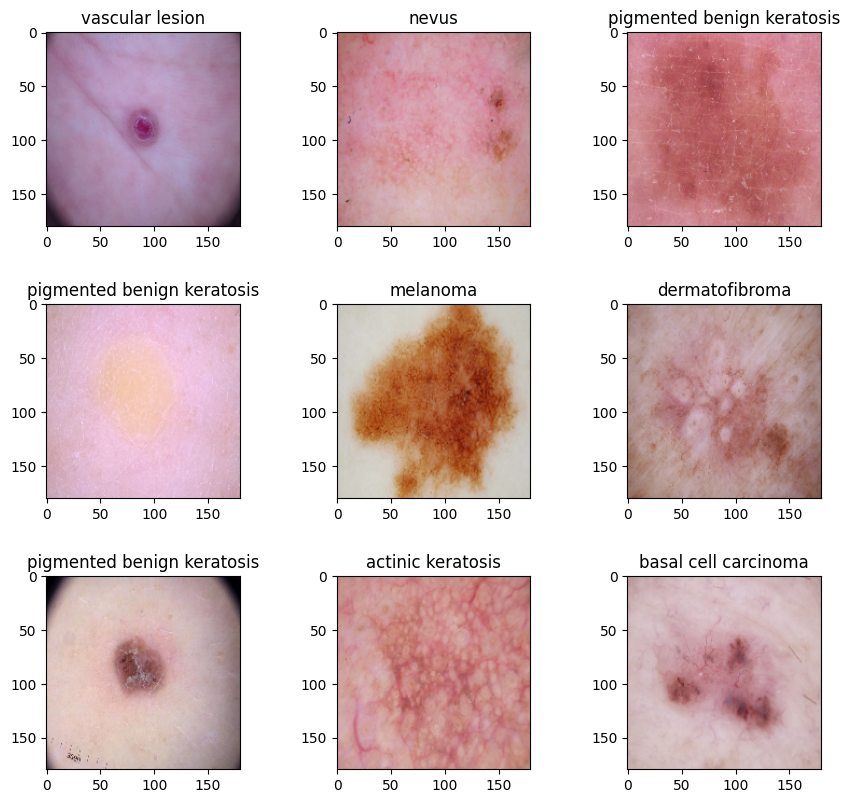

In [ ]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize

fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(wspace=0.5)

for image, label in train_ds.take(1):
  for i in range(len(class_names)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
  plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

num_classes = 9

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3))])    # To rescale the images
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_height, img_width, 3)))                                  # Adding first convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))                                                                          # Adding next convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))                                                                         # Adding next convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())                                                                                                   # Adding layer to flatten
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 90, 90, 64)        0         
                                                        

There are total 8,024,393 parameters which are trainable

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
from tensorflow.keras.optimizers import RMSprop      
model.compile(optimizer='adam',                                                               #Optimizer used is adam and loss function is CategoricalCrossentropy
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 90, 90, 64)        0         
                                                        

### Train the model

In [ ]:
epochs = 20                                            # Number of epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 26s 146ms/step - loss: 1.9967 - accuracy: 0.2679 - val_loss: 1.9778 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.7156 - accuracy: 0.3940 - val_loss: 1.6371 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5329 - accuracy: 0.4648 - val_loss: 1.5508 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 2s 34ms/step - loss: 1.4141 - accuracy: 0.5078 - val_loss: 1.4092 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 1.3883 - accuracy: 0.5234 - val_loss: 1.3903 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 2s 37ms/step - loss: 1.2937 - accuracy: 0.5474 - val_loss: 1.3521 - val_accuracy: 0.5503
Epoch 7/20
56/56 [==============================] - 2s 34ms/step - loss: 1.2609 - accuracy: 0.5469 - val_loss: 1.3981 - val_accuracy: 0.5280
Epoch 8/20
56/56 [====

### Visualizing training results

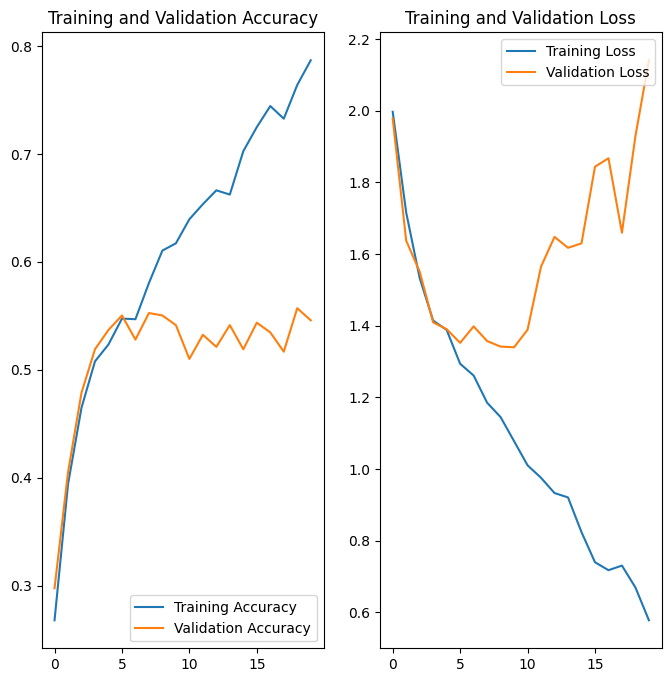

In [ ]:
# To visulaize the accuracy and losses
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here


*   The training accuracy seems to follow linear pattern. However the validation accuracy seems to be in around range of 50%-55%
*   The training accuracy is high (~80%) which shows a good learning of training data. However the accuracy of validation is low (55%). This shows a case of overfitting
*   The validation loss is also very high, this could be again an indication of overfitting
*   Proper augmentation strategy need to be applied





In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

aug_data = keras.Sequential([
              layers.experimental.preprocessing.RandomFlip(mode = 'horizontal_and_vertical', input_shape = (img_height, img_width, 3)),
              layers.experimental.preprocessing.RandomZoom(height_factor = (-0.2,0.2), width_factor=(-0.2, 0.2), fill_mode = 'reflect'),
              layers.experimental.preprocessing.RandomRotation(factor = (-0.2,0.2), fill_mode='reflect')
])

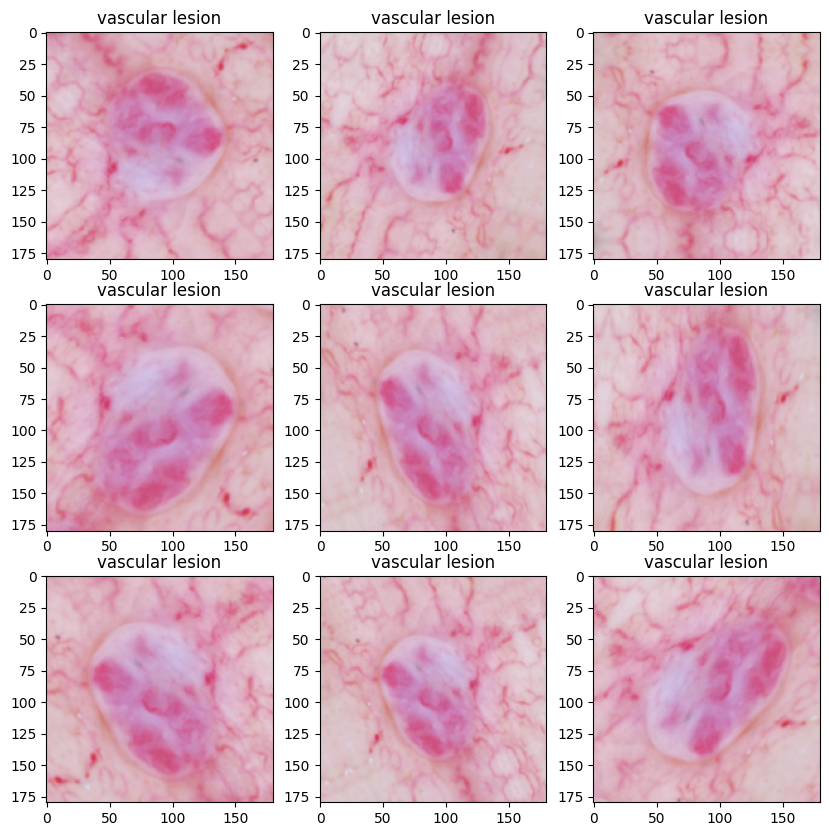

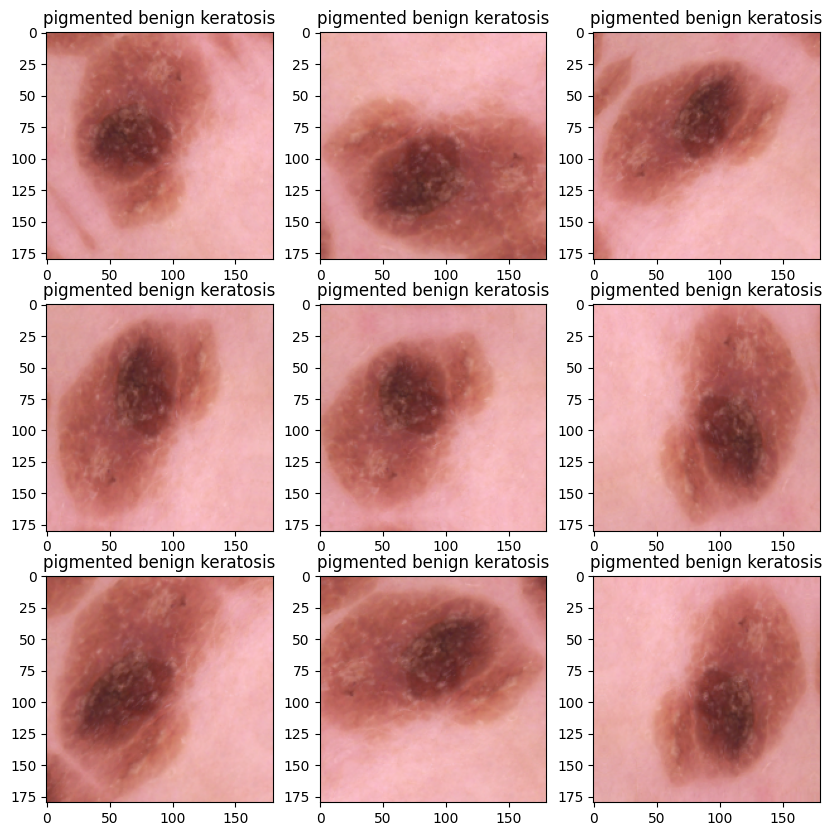

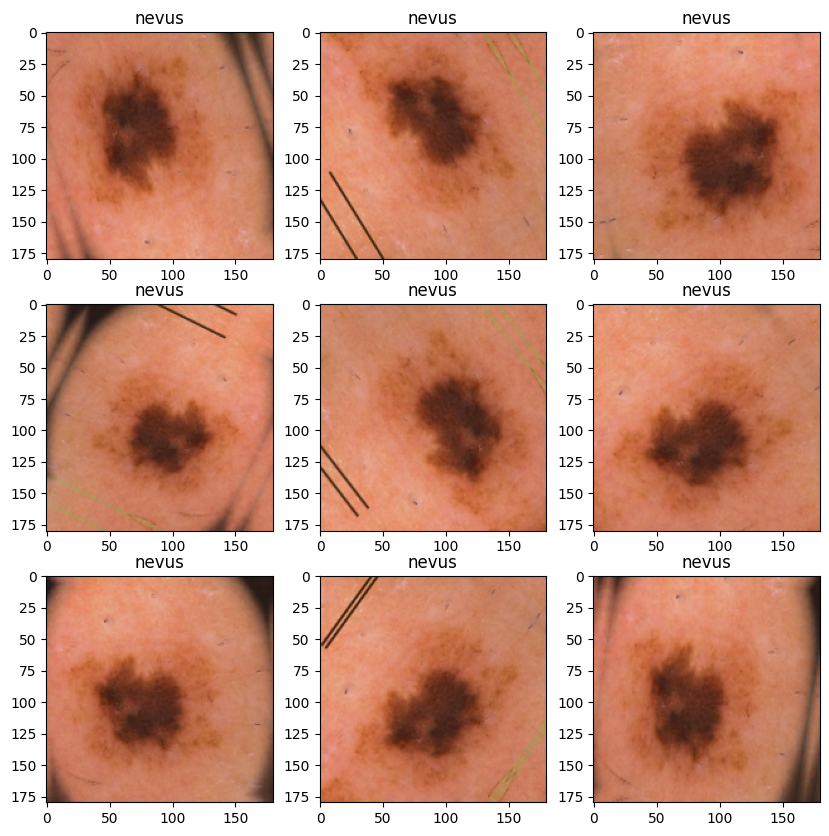

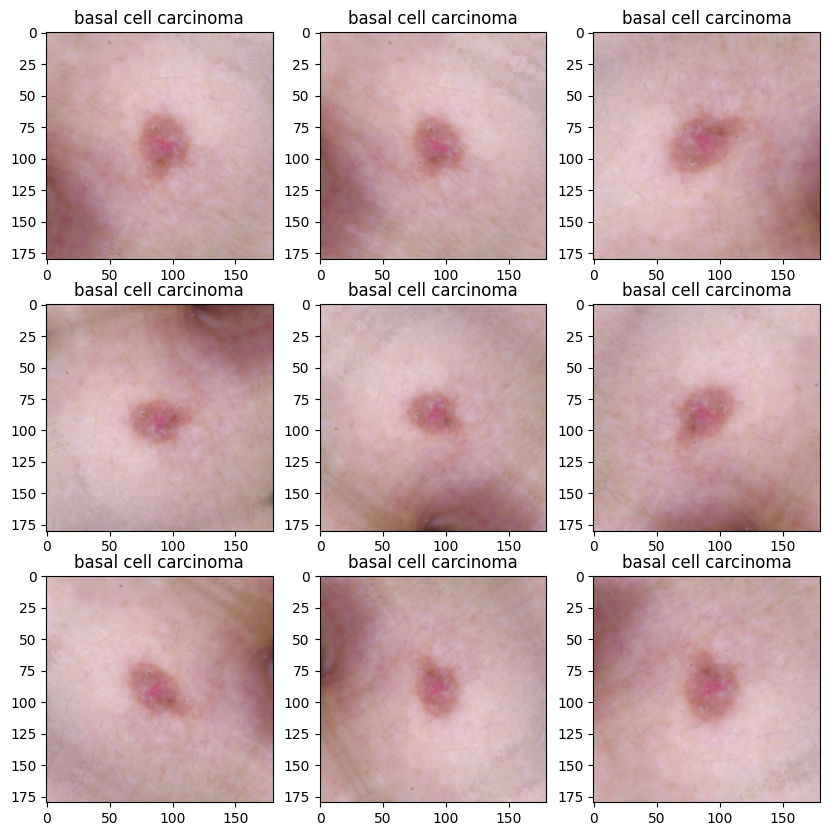

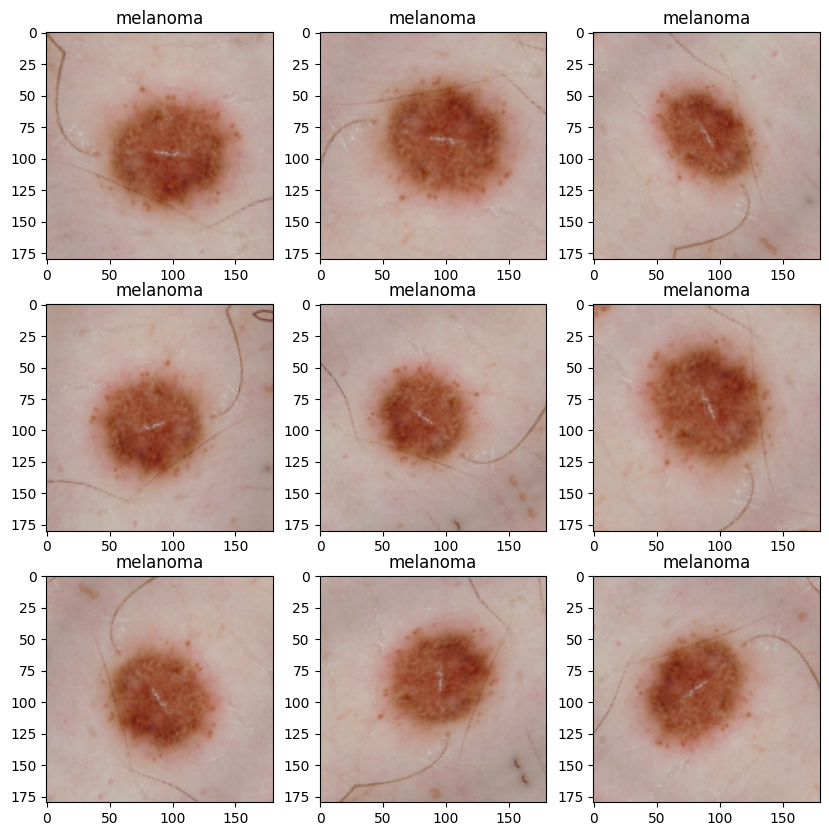

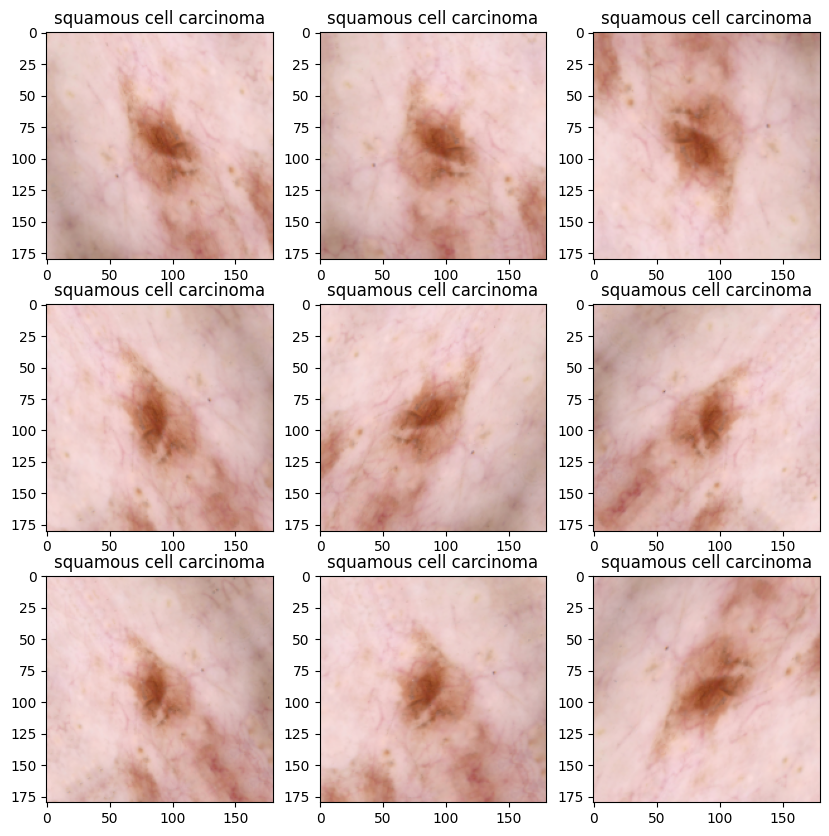

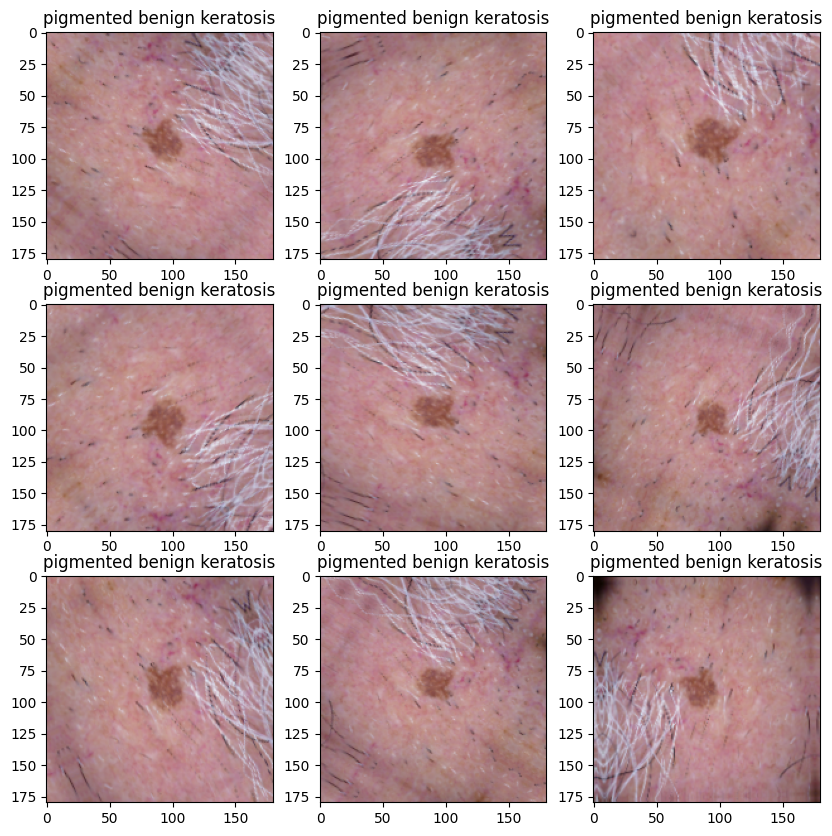

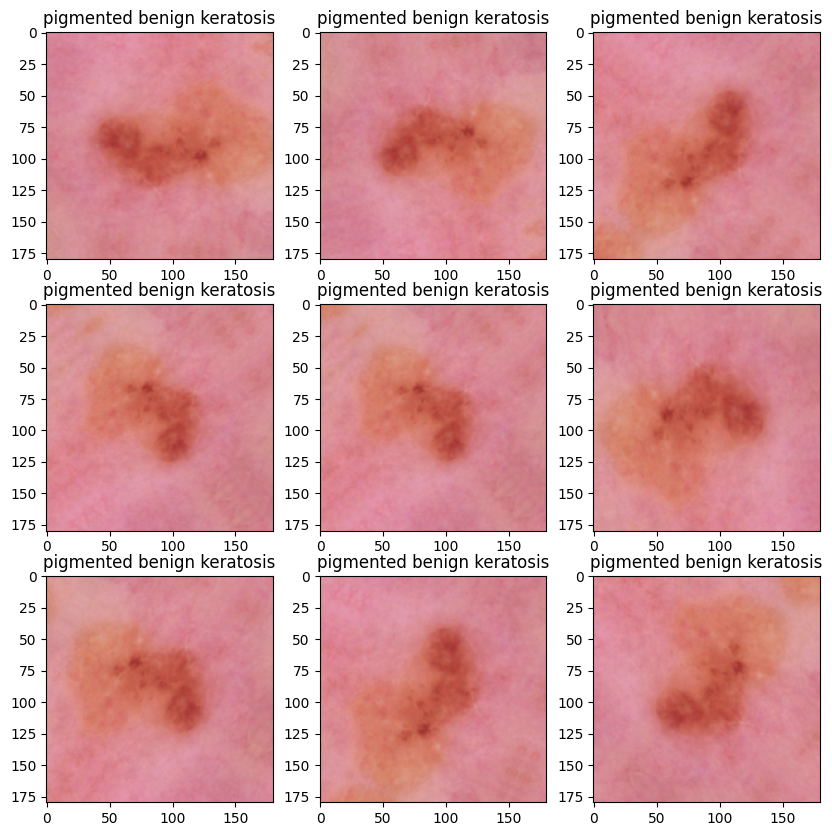

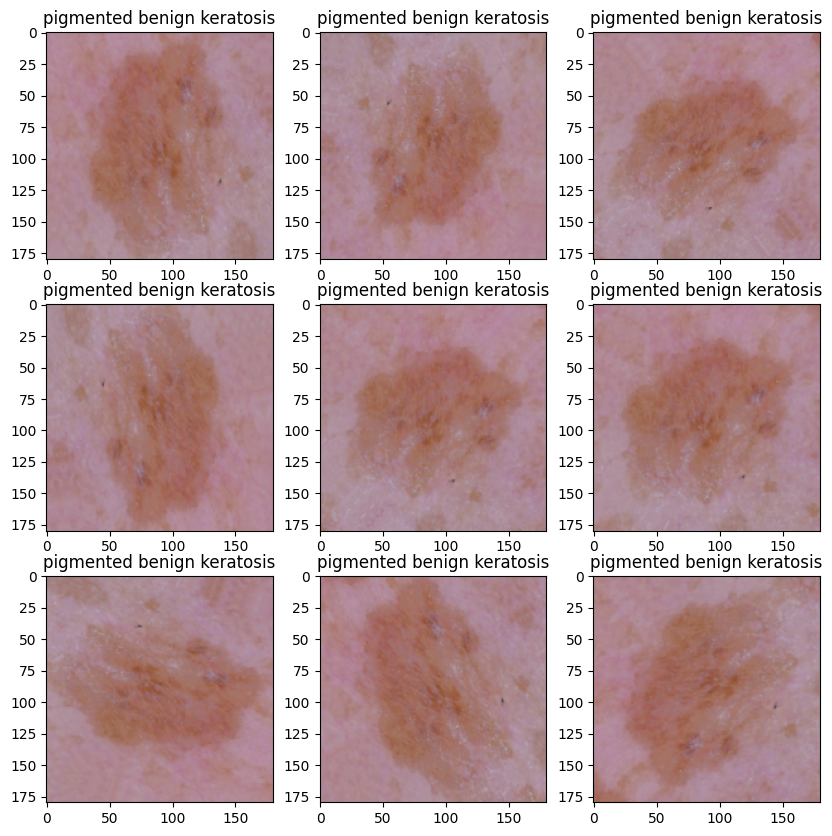

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here


fig.subplots_adjust(wspace=0.5)                   
for k in range(len(class_names)):                                               # To get the images of all the classes with variations obtained from RandomFlip, RandomZoom and RandomRotation
  fig = plt.figure(figsize = (10,10))
  for image, label in train_ds.take(1):
    for i in range(len(class_names)):
      plt.subplot(3, 3, i+1)
      plt.imshow(aug_data(image)[k].numpy().astype('uint8'))
      plt.title(class_names[label[k]])
    plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

num_classes = 9

model = Sequential([aug_data, layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3))])
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_height, img_width, 3)))                                  # Adding first convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))                                                                          # Adding next convolution layer 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))                                                                         # Adding next convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())                                                                                                   # Adding layer to flatten
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

Total parameters are 8,024,393 which are trainable

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 61ms/step - loss: 2.4284 - accuracy: 0.1752 - val_loss: 2.0599 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 3s 57ms/step - loss: 1.9977 - accuracy: 0.2277 - val_loss: 1.8955 - val_accuracy: 0.2528
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 2.0317 - accuracy: 0.2372 - val_loss: 1.9344 - val_accuracy: 0.2483
Epoch 4/20
56/56 [==============================] - 3s 58ms/step - loss: 1.8712 - accuracy: 0.2969 - val_loss: 1.7270 - val_accuracy: 0.3691
Epoch 5/20
56/56 [==============================] - 3s 57ms/step - loss: 1.7045 - accuracy: 0.3750 - val_loss: 2.4257 - val_accuracy: 0.2662
Epoch 6/20
56/56 [==============================] - 3s 60ms/step - loss: 1.8674 - accuracy: 0.3343 - val_loss: 1.7980 - val_accuracy: 0.3356
Epoch 7/20
56/56 [==============================] - 3s 55ms/step - loss: 1.6863 - accuracy: 0.3934 - val_loss: 1.7035 - val_accuracy: 0.4183
Epoch 8/20
56

### Visualizing the results

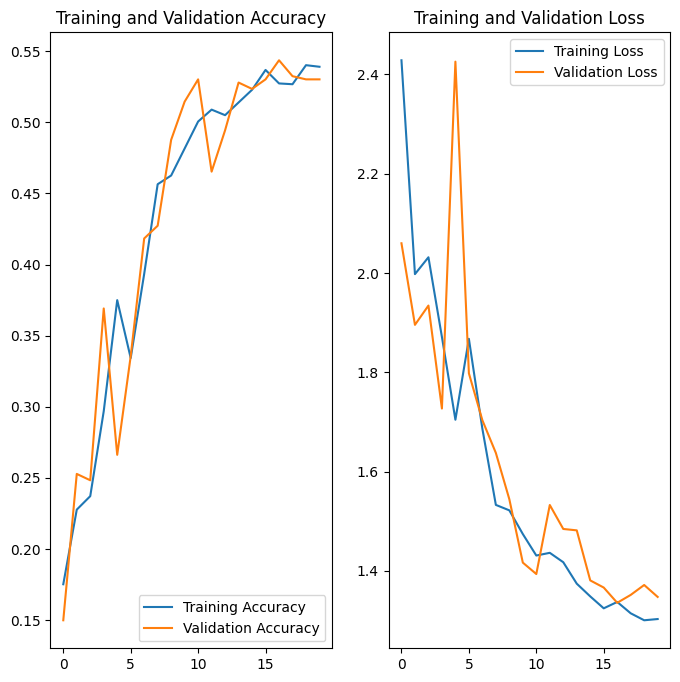

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After the fit, there are following observations:


*   The model training and validation accuracy are now in similar range
*   There is a similar observation for training and validation loss
*   So there is some improvement in terms of overfititng, but accuracy remains same
*   However, overall accuracy has not improved and in same range (~55%)
*   Hence the model seems to be underfitting now



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
from glob import glob

In [ ]:
path_list_current = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]                                              # For list of the current paths of the images
path_list_current

['/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025557.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024949.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024795.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025644.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024799.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025530.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025260.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025322.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024666.jpg',
 '/content/gdrive/MyDrive/Co

In [ ]:
lesion_list_current = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]    # For list of the labels of the images
lesion_list_current

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [ ]:
dataframe_dict_current = dict(zip(path_list_current, lesion_list_current))                                                         # For creating dictionary of path and labels for all the images

In [ ]:
dataframe_dict_current

{'/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025557.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024949.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024795.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025644.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0024799.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025530.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/ISIC_0025260.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal ce

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict_current.items()),columns = ['Path','Label'])                                        #Finally a dataframe can be obtained from the dictionary created 
original_df

Path                 Label
0     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
1     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
2     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
3     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
4     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
...                                                 ...                   ...
2234  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2235  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2236  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2237  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2238  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis

[2239 rows x 2 columns]

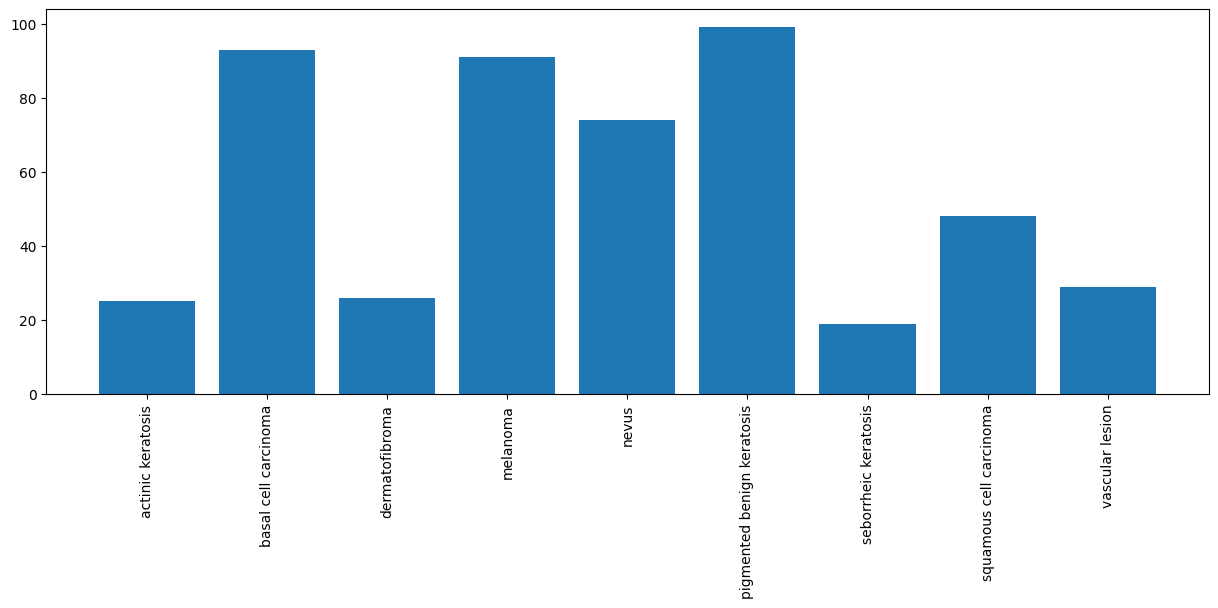

actinic keratosis : 4.96 %
basal cell carcinoma : 18.45 %
dermatofibroma : 5.16 %
melanoma : 18.06 %
nevus : 14.68 %
pigmented benign keratosis : 19.64 %
seborrheic keratosis : 3.77 %
squamous cell carcinoma : 9.52 %
vascular lesion : 5.75 %


In [ ]:
## Your code goes here.
# This is to plot the imbalance distribution of disease classes
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(15, 5))
for image, label in train_ds:
  for i in range(9):
    data[class_names[label[i]]].append(image[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()), rotation = 90)

plt.show()


# This is to obtain the percentage distribution of the classes
total = 0
for i in data:
  total = total + data[i]

for i in data:
  print(i,':',round(data[i]/total*100,2),'%')

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
 - *seborrheic keratosis* class has least number of samples, followed by *actinic keratosis*

#### - Which classes dominate the data in terms proportionate number of samples?
 - *pigmented benign keratosis* class has highest proportion of number of samples, followed by *basal cell carcinoma* and *melanoma* classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor                              # installing Augmentor to use

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F50DD231DE0>: 100%|██████████| 500/500 [00:26<00:00, 18.92 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50DC5FFD30>: 100%|██████████| 500/500 [00:30<00:00, 16.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F50DD2D4880>: 100%|██████████| 500/500 [00:24<00:00, 20.67 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F516C3416F0>: 100%|██████████| 500/500 [01:40<00:00,  4.97 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F516C3417E0>: 100%|██████████| 500/500 [01:46<00:00,  4.71 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50DC46C3A0>: 100%|██████████| 500/500 [00:22<00:00, 22.31 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F50DC304D90>: 100%|██████████| 500/500 [00:47<00:00, 10.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50DC49AF20>: 100%|██████████| 500/500 [00:21<00:00, 22.89 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F516C1E8BB0>: 100%|██████████| 500/500 [00:20<00:00, 23.88 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4486


#### Roughly 4500 new images were added (~ 500 images X 9 classes = 4500)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]                                       # Path for newly added images
path_list_new

['/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031007.jpg_0bc3c2bf-fd22-4738-afd3-a0af4571c22d.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028937.jpg_30c5b599-e59e-418c-a8d5-45729c609242.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026940.jpg_7fc7321d-ee55-4f49-b86a-bc6bcfbb7aa4.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031351.jpg_6eb3bd79-7737-4890-9319-833f1a432d0f.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028989.jpg_ce67ae6c-5b1d-4258-8792-77d8cabf1238.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/ba

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]           # Labels for newly added images
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))                                                      # Creating dictionary with path and labels for new images

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])                                     # New dataframe created for path and location of new images
df2
new_df = original_df.append(df2)                                                                                    # Appending old and new dataframe will have path and label information of all the images

<ipython-input-38-6e6d3a6fae19>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
df2

Path                 Label
0     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
1     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
2     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
3     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
4     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
...                                                 ...                   ...
4481  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4482  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4483  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4484  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4485  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis

[4486 rows x 2 columns]

In [ ]:
original_df

Path                 Label
0     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
1     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
2     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
3     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
4     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
...                                                 ...                   ...
2234  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2235  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2236  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2237  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
2238  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis

[2239 rows x 2 columns]

In [ ]:
new_df.shape

(6725, 2)

In [ ]:
new_df

Path                 Label
0     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
1     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
2     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
3     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
4     /content/gdrive/MyDrive/Colab Notebooks/Melano...  basal cell carcinoma
...                                                 ...                   ...
4481  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4482  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4483  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4484  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis
4485  /content/gdrive/MyDrive/Colab Notebooks/Melano...  seborrheic keratosis

[6725 rows x 2 columns]

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          862
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [ ]:
new_df['Label'].value_counts(normalize = True)*100

pigmented benign keratosis    14.304833
melanoma                      13.947955
basal cell carcinoma          12.817844
nevus                         12.743494
squamous cell carcinoma       10.126394
vascular lesion                9.501859
actinic keratosis              9.130112
dermatofibroma                 8.847584
seborrheic keratosis           8.579926
Name: Label, dtype: float64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/Melanoma Assignment/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset='training',       ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6725 files belonging to 9 classes.
Using 5380 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',      ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6725 files belonging to 9 classes.
Using 1345 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras.layers import BatchNormalization

num_classes = 9

model = Sequential([aug_data, layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3))])
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_height, img_width, 3)))                                  # Adding first convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))                                                                          # Adding next convolution layer 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))                                                                         # Adding next convolution layer 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())                                                                                                   # Adding layer to flatten
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                        

#### There are 8,025,289 total parameters of which 448 are non-trainable

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(   # your model fit code
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 49s 237ms/step - loss: 2.8154 - accuracy: 0.1974 - val_loss: 5.8892 - val_accuracy: 0.0870
Epoch 2/30
169/169 [==============================] - 40s 228ms/step - loss: 2.0510 - accuracy: 0.2019 - val_loss: 5.1475 - val_accuracy: 0.0944
Epoch 3/30
169/169 [==============================] - 35s 201ms/step - loss: 2.0219 - accuracy: 0.2074 - val_loss: 2.1388 - val_accuracy: 0.2379
Epoch 4/30
169/169 [==============================] - 36s 207ms/step - loss: 2.0097 - accuracy: 0.2102 - val_loss: 1.9788 - val_accuracy: 0.2223
Epoch 5/30
169/169 [==============================] - 40s 229ms/step - loss: 1.9977 - accuracy: 0.2125 - val_loss: 1.9598 - val_accuracy: 0.2335
Epoch 6/30
169/169 [==============================] - 35s 199ms/step - loss: 1.9587 - accuracy: 0.2160 - val_loss: 1.9157 - val_accuracy: 0.2483
Epoch 7/30
169/169 [==============================] - 37s 212ms/step - loss: 1.9541 - accuracy: 0.2149 - val_loss: 1.8399 - val_accuracy: 0.2

#### **Todo:**  Visualize the model results

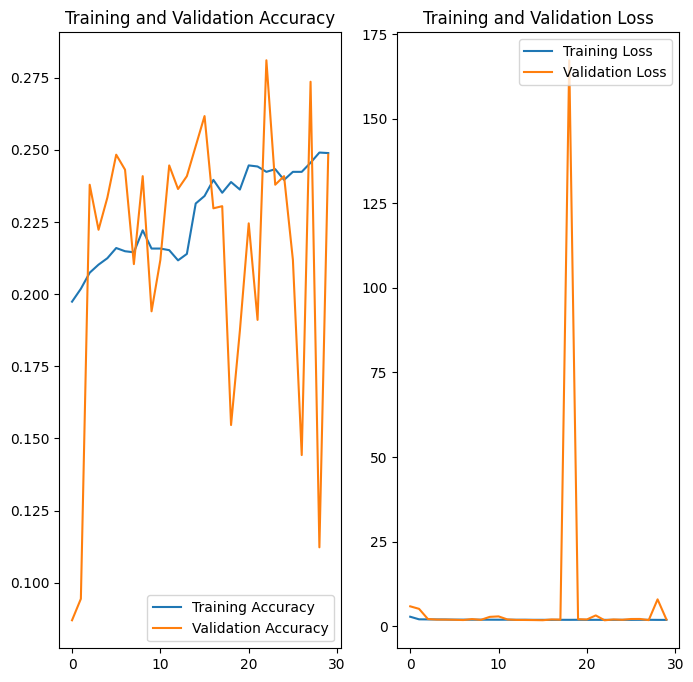

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Appication of BatchNormalization is not helpful, so will try one model without implementing BatchNormalization

In [ ]:
## your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras.layers import BatchNormalization

num_classes = 9

model = Sequential([aug_data, layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3))])
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_height, img_width, 3)))                                  # Adding first convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))                                                                          # Adding next convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))                                                                         # Adding next convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())                                                                                                   # Adding layer to flatten
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

In [ ]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(   # your model fit code
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 37s 194ms/step - loss: 2.1683 - accuracy: 0.1822 - val_loss: 1.8960 - val_accuracy: 0.2632
Epoch 2/30
169/169 [==============================] - 36s 205ms/step - loss: 1.7299 - accuracy: 0.3426 - val_loss: 1.5404 - val_accuracy: 0.4268
Epoch 3/30
169/169 [==============================] - 39s 224ms/step - loss: 1.5426 - accuracy: 0.4045 - val_loss: 1.7516 - val_accuracy: 0.4074
Epoch 4/30
169/169 [==============================] - 34s 195ms/step - loss: 1.5082 - accuracy: 0.4188 - val_loss: 1.5381 - val_accuracy: 0.4320
Epoch 5/30
169/169 [==============================] - 35s 202ms/step - loss: 1.4340 - accuracy: 0.4487 - val_loss: 1.3336 - val_accuracy: 0.4870
Epoch 6/30
169/169 [==============================] - 35s 203ms/step - loss: 1.3650 - accuracy: 0.4662 - val_loss: 1.2972 - val_accuracy: 0.4870
Epoch 7/30
169/169 [==============================] - 34s 194ms/step - loss: 1.3653 - accuracy: 0.4654 - val_loss: 1.4561 - val_ac

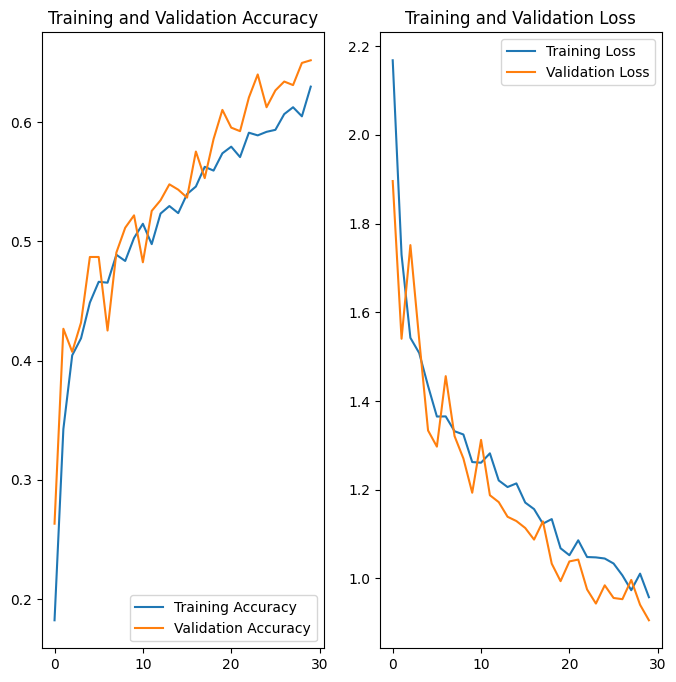

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- The training and validation accuracy is in range of 63-65% which is better than previous model
- The overfitting issue has been resolved as the training and validation accuracy are in similar ranges
- The data augmentation technique helped to overcome overfitting and further class rebalance helped in improving accuracies
- There are further scopes of improvement in model by adding more layers, more images in the augmentation step (instead of 500 images in each class) and more epochs
